# Intro Julia

In [1]:
using Random
using Statistics
using StatsBase
using LinearAlgebra

In [4]:
# 整除
a = div(10, 3)
@show(a)
# 余数
a = 10 % 3
b = rem(10, 3)
@show(a);
@show(b);

a = 3
a = 1
b = 1


1

## 函数进阶

In [14]:
# 匿名函数
a = x -> x^2
b = a(2)
@show(b)
a = function (x)
    x^2
end
b = a(2)
@show(b)

# 函数工厂
c = function (a)
    x -> x^a
end
b = c(2)
d = b(3)
@show(d)

b = 4
b = 4
d = 9


9

In [10]:
# 链式调用和函数复合
# x |> f 可以表示f(x) ,这样 x |> f |> g 就是调用复合函数 g(f(x)) 
# 也可以用 ∘ 运算符，则g(f(x))可以表示成 g ∘ f (x)

a = [1:5;] |> (x -> x .^ 2) |> sum
@show a

# 加 . 的运算
a = [1:5;] .|> (x -> x^2) |> sum
@show a

# 在没有确定函数名时，使用 ∘ 很方便
funcs = [uppercase, lowercase, first]
fruits = ["apple", "banana", "carrot"]
fnew = funcs[1] ∘ funcs[3]
y = map(fnew, fruits)
y |> show

a = 55
a = 55


['A', 'B', 'C']

In [9]:
# 闭包 closure
# 有状态的函数，julia中没有面向对象的模式，所以闭包登场
# 用闭包计算 fib_n
function fib_generator()
    saved = Dict(0 => 0, 1 => 1)
    function fib(n)
        if n ∉ saved.keys
            saved[n] = fib(n - 1) + fib(n - 2)
        end
        return saved[n]
    end
end
fib = fib_generator()(8)
fib |> show

21

In [32]:
## 函数式编程 map(), filter(), reduce()
# 一般用在无名函数，有名字的函数可以用f.(x)来替代
map(x -> x^2, [1, 2, 3]) |> println #[1,2,3].^2

# map do 模块，对于无名函数有多行的情况
map([1, 2, 3]) do x
    x = x^2 + 1
    x * x
end |> println

# 对于多元函数
map((x, y) -> x + y, [1, 2, 3], [1, 1, 1]) |> println

# filter 也叫做示性函数
filter(x -> x > 0, [1, 2, -1]) |> println

# reduce 约化计算
reduce(+, [1, 2, 3]) |> println # 等价于 sum([1,2,3])

# 按维度约化
mat = reshape([1:9;], 3, 3)
mat |> show
reduce(+, mat, dims=1) |> println

# map 和 reduce 结合
mapreduce(x -> x^2, +, [1, 2, 3]) |> show

# accumulate
# 类似于sum()求总和而cumsum()给出累计求和的所有中间结果， cumprod()计算连乘过程中的所有中间结果， 函数accumulate()可以将二元运算累计地计算并给出每一步的中间结果。 如：
cumsum(1:5) |> println
accumulate(+, 1:5) |> println

[1, 4, 9]


[4, 25, 100]
[2, 3, 4]
[1, 2]
6
[1 4 7; 2 5 8; 3 6 9][6 15 24]
14[1, 3, 6, 10, 15]


[1, 3, 6, 10, 15]


## 异常处理
```{julia}
try
    可能出错的程序
catch 异常类型变量名
    异常处理程序
finally
    无论如何最后都要执行的程序
end
```

## 复合数据进阶

In [41]:
v1 = [1, 3, 4, 9, 13]
for i in eachindex(v1)
    println("v1[", i, "] = ", v1[i])
end

for i = 1:length(v1)
    println("v1[", i, "] = ", v1[i])
end

# 也可以不利用下标而是直接对元素遍历，如
for xi in v1
    println(xi)
end

# 因为Julia用OffsetArrays支持不从1开始的下标， 所以保险起见， 可以用firstindex(v)获取向量v的第一个下标， 用lastindex(v)获取v的最后一个下标，如：
for i = firstindex(v1):lastindex(v1)
    println("v1[", i, "] = ", v1[i])
end

# 还可以用enumerate同时对向量下标和元素值遍历，如：
for (i, xi) in enumerate(v1)
    println("v1[", i, "] = ", xi)
end

# 列表推导
[x * x for x in 1:10 if x % 3 == 1] |> show

# sortperm(x)返回为了将x从小到大排序所应该使用的下标序列， 如：
sortperm([11, 13, 12]) |> show

# 矩阵
A1 = [1 2 3; 4 5 6] |> show

v1[1] = 1
v1[2] = 3
v1[3] = 4
v1[4] = 9
v1[5] = 13
v1[

1] = 1
v1[2] = 3
v1[3] = 4
v1[4] = 9
v1[5] = 13
1
3
4
9
13
v1[1] = 1
v1[2] = 3
v1[3] = 4
v1[4] = 9
v1[5] = 13
v1[1] = 1
v1[2] = 3
v1[3] = 4
v1[4] = 9
v1[5] = 13
[1, 16, 49, 100][1, 3, 2][1 2 3; 4 5 6]

In [7]:
# 字符串插值
# 在字符串中可以用$变量名或$(表达式)的格式插入变量值或者表达式值。

x = 123
a = "abv $x" |> show

# 字符串拼接、这一点与其他代码不同 Pyhton R
"x = " * string(x)

# 格式转换，使用C语言的printf格式约
using Printf
s = @sprintf "%.40f" big(π)

"abv 123"

"3.1415926535897932384626433832795028841972"

In [8]:
# 模块
# 用 module 关键字定义模块
# 如果代码没有定义在一个显式的模块中，则其在 Main 这个默认模块中
# 可以通过关键字 export 可以指定模块中的哪些符号可以通过导入而对其他模块可见
# 下面是一个简单的模块定义
module MyStat
export mean, rmse
function mean(x)
  sum(x) / length(x)
end
function rmse(x)
  sqrt(sum(x .^ 2) / length(x))
end
end

Main.MyStat

In [13]:
# 导入模块
# using、import
# using Module_name 可以把Module_name 中 export 的符号引入当前模块
using .MyStat
rmse([1, 2, 3, 4])

# .MyStat 前的.表示导入的模块就在当前环境，表示在当前名字空间中查找MyStat模块定义
# using整个模块是比较不安全的做法，安全的做法
using .MyStat: mean, rmse
rmse([1, 2, 3, 4])

# 可以用import声明导入单个的函数
import .MyStat.mean, .MyStat.rmse
rmse([1, 2, 3, 4])

# 也可以用import仅导入模块名， 其中的函数需要用“模块名.函数名”的格式调用
import .MyStat
MyStat.rmse([1, 2, 3, 4])

# 当一个模块的全局变量通过using或者import导入到当前模块后， 当前模块不允许存在同名的全局变量， 而且也只允许读取其它模块中的全局变量值而不允许对其进行修改。
# 一个模块可以在一个文件里，也可以分布在多个文件中，通过include()函数载入到模块定义中
# 为了调用MyStat模块， 设源文件保存在mystat.jl中， 可以先include("mystat.jl")然后用MyStat.mean()的格式调用函数

2.7386127875258306

# 类型系统

In [2]:
# typeof isa
@show typeof(43)
@show 43 isa Int64
@show [typemin(Int8), typemax(Int8)]

# eps(Float64)返回64位双精度浮点型数的机器Epsilon值， 即 1+ϵ≠1，但是 1+ϵ2 则不能与1.0区分开来。
@show eps(Float64)
# Float64型的绝对值最小的正常精度的值：
floatmin(Float64)

typeof(43) = Int64
43 isa Int64 = true
[typemin(Int8), typemax(Int8)] = Int8[-128, 127]
eps(Float64) = 2.220446049250313e-16


2.2250738585072014e-308

用程序语言术语描述， Julia语言的类型系统是动态的，主格的(nominative), 参数化的。 通用类型可以带有类型参数。 类型的层次结构是显式声明的， 不是由兼容结构隐含的。 实体类型(concrete types)不能互相继承， 这与很多面向对象系统不同。 Julia的理念认为继承数据结构并不重要，继承行为才是最有用的。Julia的所有类型都可以表示在一个类型树中， 类型分为抽象类型与实体类型， 每个类型有且仅有一个父类型， 最高层的父类型是Any类型。 每个类型都属于Any类型。 实体类型不允许有子类， 一个类型不允许有多个直接的父类。
抽象类型仅用来作为其他类型的父类， 没有取类型的值。 例如，Julia的数值类型可以由如下的类型结构组成：
```{julia}
abstract type Number end
abstract type Real <: Number end
abstract type AbstractFloat <: Real end
abstract type Integer <: Real end
abstract type Signed <: Integer end
abstract type Unsigned <: Integer end
```


In [18]:

# 单精度 
1.2f-3
# 双精度
1.2e-3

#BigInt是任意精度整数， BigFloat是任意精度浮点数。
@show x::BigInt = 100000000000000000000000000000000000000000

# 用<:运算符来判断子类关系是否成立，如
@show Int32 <: Real

# 每个类型有且仅有一个父类型(supertype)， 用函数supertype访问，如：
@show supertype(Int32)

subtypes(Int) |> show
subtypes(Number) |> show

# 用missing表示缺失值\特殊值nothing表示“不存在”
@show [1.5, missing]
@show ismissing.([1.5, missing])

# skipmissing(x)结果类似一个迭代器， 遍历其元素时会跳过缺失值
for i in skipmissing([1, 2, 3, missing, 5])
    println(i)
end

# :: 符号
# 1. 类型验证
6::Int
# 2 类型声明
x6::Int = 6

# 抽象类型
abstract type MyType end
# 类型继承
abstract type MyContType <: MyType end

x::BigInt = 100000000000000000000000000000000000000000 = 100000000000000000000000000000000000000000
Int32 <: Real = true
supertype(Int32) = Signed
Type[]Any[Complex, Real][1.5, missing] = Union{Missing, Float64}[1.5, missing]
ismissing.([1.5, missing]) = Bool[0, 1]
1
2
3
5


# 数值计算

## 误差的累积会放大误差
把0.1累加一万次，与真实值1e6比较，误差约为$10^{-4}$，双精度数$ε_m$在$10^{-16}$左右，1e6的表示误差在$10^{-10}$左右，这个累积误差比表示误差大了6个数量级。 

In [2]:
x = 0.0
for i = 1:10_000_000
    x += 0.1
end
x - 1_000_000.0

-0.0001610246254131198

## 计算同生日概率
一个班n个人，至少两人生日重合的概率：$p_n = 1 - \frac{P^n_{365}}{365^n}$

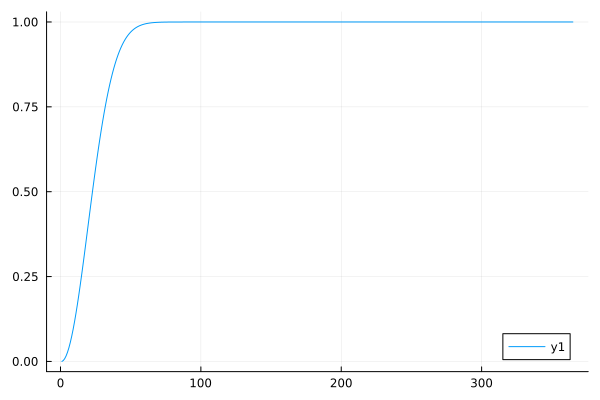

In [11]:
days = 365
nvec = 1:days
pvec = zeros(days)
pvec1 = zeros(days)
pcum = 1
for n = 1:days
    pcum *= (365 - (n - 1)) / 365
    pvec[n] = 1 - pcum
end

# 向量式写法
pvec1 = 1 .- cumprod((365 .- (0:364)) ./ 365)

using Plots
plt = plot(1:365, pvec1)
display(plt)

## 样本均值递推算法

In [17]:
x = 1:2:100
ex = 0
i = 0
for j = x
    ex = ex * i / (i + 1) + j / (i + 1)
    i = i + 1
end

using Statistics
[ex, mean(x)]

2-element Vector{Float64}:
 50.0
 50.0

In [22]:
function mean_iter(x::Vector)
    n = length(x)
    xm::Float64 = x[1]
    for k = 2:n
        xm = xm * (k - 1) / k + x[k] / k
    end
    xm
end
# 测试
using Random, Statistics
Random.seed!(101)
x = round.(rand(5), digits=2);
@show x;
@show mean_iter(x);
@show mean(x)

x = [0.72, 0.18, 0.31, 0.54, 0.93]
mean_iter(x) = 

0.536
mean(x) = 0.536


0.536

# Kobayashi 混合同余发生器
$x_n = (314159269 * x_{n-1} + 453806245) (\mod 2^{31})$ 

In [10]:
function rng_KS_fixed_seed(n=1, seed=0)
    y = Vector{Float64}(undef, n)
    x::Int64 = seed
    for i in 1:n
        x = (314159269 * x + 453806245) % 2147483648
        y[i] = x / 2147483648
    end
    y
end
# test
y = rng_KS_fixed_seed(100)
[mean(y), var(y)]

2-element Vector{Float64}:
 0.4801732623297721
 0.09080299172054443

用“闭包”（closure）来记住函数状态，这样可以不用每次输入seed

In [13]:
function rng_KS(seed=0)
    local the_seed::Int64 = seed

    function rng(n=1)
        y = Vector{Float64}(undef, n)
        x::Int64 = the_seed
        for i in 1:n
            x = (314159269 * x + 453806245) % 2147483648
            y[i] = x / 2147483648
        end
        the_seed = x
        y
    end
    rng
end

rng = rng_KS()
[rng(2), rng(2)]

2-element Vector{Vector{Float64}}:
 [0.2113200002349913, 0.010224699042737484]
 [0.1883314079605043, 0.66593280993402]